In [1]:
# import modules we are going to use
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


folder_path = "D:\\CODE\\Projects\\Rain in Australia"
os.chdir(folder_path)

In [2]:
# install ipynb import
!pip install ipynb

Before cleaning:  3261
After cleaning:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   WindDir9am     131127 non-null  object 
 8   WindDir3pm     137117 non-null  object 
 9   WindSpeed9am   139732 non-null  float64
 10  WindSpeed3pm   138256 non-null  float64
 11  Humidity9am    139270 non-null  float64
 12  Humidity3pm    137286 non-null  float64
 13  Pressure9am    127044 non-null  float64
 14  Pressure3pm    127018 non-null  float64
 15  Cloud9am       88162 non-null   float64
 16  Cloud3pm       84693 non-null   

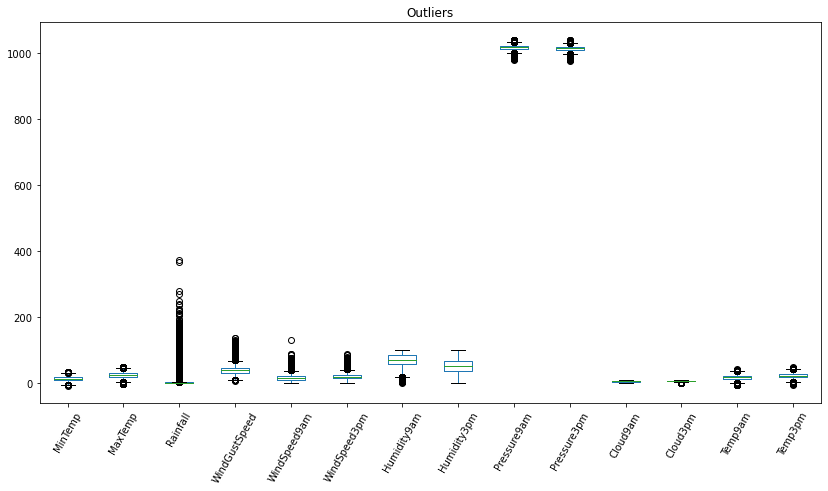

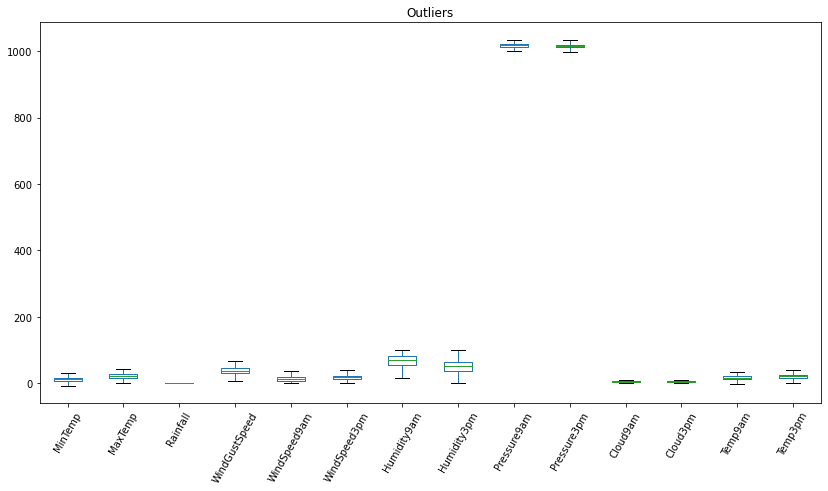

In [3]:
# import the datacleaning.ipynb
from ipynb.fs.full.datacleaning import *

In [4]:
# check if we imported properly.
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


# Data analysis and visualization

<AxesSubplot:>

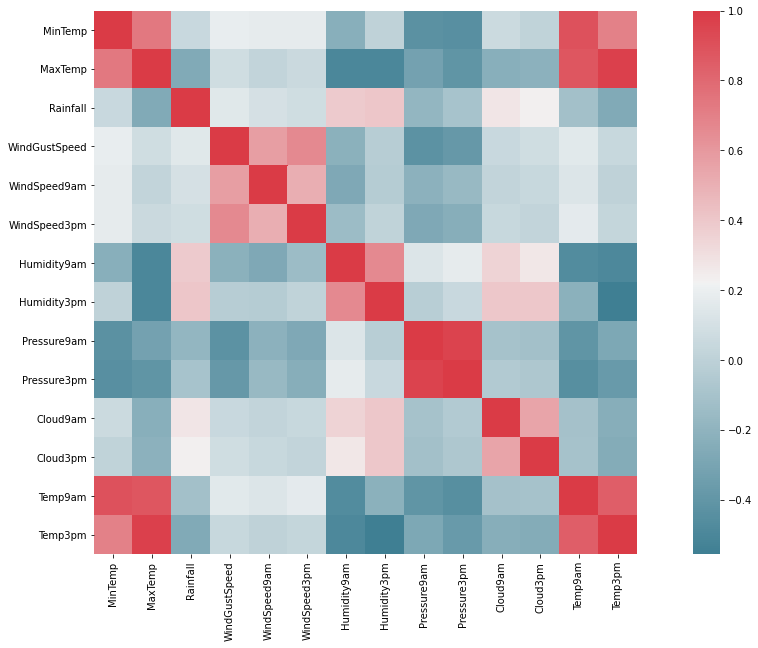

In [5]:
# Visualize the correlation between variables
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<AxesSubplot:>

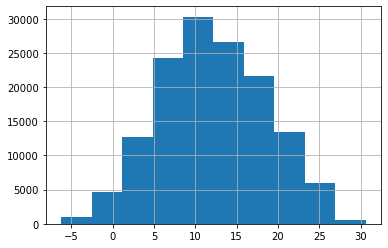

In [6]:
data.MinTemp.hist()

<AxesSubplot:>

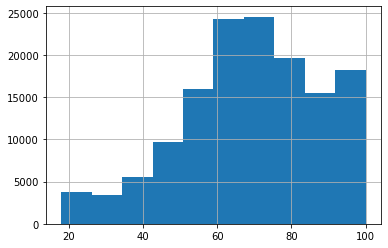

In [7]:
data.Humidity9am.hist()

<AxesSubplot:>

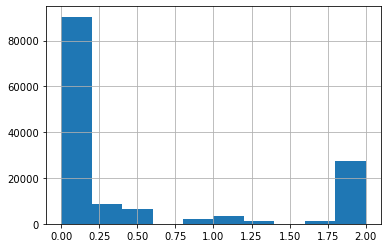

In [8]:
data.Rainfall.hist()

In [9]:
# initialize a set with all locations we read from our dataframe.
locations = set()
for loc in data['Location']:
    locations.add(loc)

In [10]:
locations

{'Adelaide',
 'Albany',
 'Albury',
 'AliceSprings',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Brisbane',
 'Cairns',
 'Canberra',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Darwin',
 'GoldCoast',
 'Hobart',
 'Katherine',
 'Launceston',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'MountGambier',
 'MountGinini',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Nuriootpa',
 'PearceRAAF',
 'Penrith',
 'Perth',
 'PerthAirport',
 'Portland',
 'Richmond',
 'Sale',
 'SalmonGums',
 'Sydney',
 'SydneyAirport',
 'Townsville',
 'Tuggeranong',
 'Uluru',
 'WaggaWagga',
 'Walpole',
 'Watsonia',
 'Williamtown',
 'Witchcliffe',
 'Wollongong',
 'Woomera'}

In [11]:
loc_max_temp = {}
loc_min_temp = {}
for i in locations:
    current_df = data[data['Location'] == i]
    maxTemp = current_df['MaxTemp']
    minTemp = current_df['MinTemp']
    max_value = maxTemp.max()
    min_value = minTemp.min()
    
    loc_max_temp[i] = max_value
    loc_min_temp[i] = min_value

    

In [12]:
loc_max_temp

{'Perth': 43.65,
 'PerthAirport': 43.65,
 'Katherine': 42.0,
 'Cairns': 38.6,
 'AliceSprings': 43.65,
 'CoffsHarbour': 39.2,
 'Townsville': 38.3,
 'Newcastle': 43.65,
 'Albany': 39.0,
 'Launceston': 39.0,
 'MountGambier': 43.65,
 'Hobart': 41.8,
 'NorfolkIsland': 28.4,
 'Cobar': 43.65,
 'Watsonia': 43.65,
 'Uluru': 43.65,
 'Melbourne': 43.65,
 'Mildura': 43.65,
 'MelbourneAirport': 43.65,
 'Moree': 43.65,
 'SalmonGums': 43.65,
 'Brisbane': 38.9,
 'SydneyAirport': 43.65,
 'PearceRAAF': 43.65,
 'MountGinini': 31.1,
 'Ballarat': 43.65,
 'Canberra': 42.0,
 'Tuggeranong': 41.1,
 'NorahHead': 43.65,
 'Sale': 43.65,
 'Bendigo': 43.65,
 'BadgerysCreek': 43.65,
 'Walpole': 39.4,
 'Wollongong': 42.4,
 'WaggaWagga': 43.65,
 'Williamtown': 43.65,
 'GoldCoast': 37.9,
 'Nuriootpa': 43.65,
 'Albury': 43.65,
 'Richmond': 43.65,
 'Woomera': 43.65,
 'Sydney': 43.65,
 'Darwin': 38.0,
 'Penrith': 43.65,
 'Witchcliffe': 40.6,
 'Adelaide': 43.65,
 'Portland': 42.5,
 'Dartmoor': 43.65,
 'Nhil': 43.65}

In [13]:
loc_min_temp

{'Perth': -0.6,
 'PerthAirport': -1.0,
 'Katherine': 5.2,
 'Cairns': 9.2,
 'AliceSprings': -5.2,
 'CoffsHarbour': 0.6,
 'Townsville': 6.4,
 'Newcastle': 2.2,
 'Albany': 1.8,
 'Launceston': -3.5,
 'MountGambier': -2.1,
 'Hobart': -0.4,
 'NorfolkIsland': 9.4,
 'Cobar': -2.0,
 'Watsonia': -2.1,
 'Uluru': -1.9,
 'Melbourne': 1.5,
 'Mildura': -3.2,
 'MelbourneAirport': -1.0,
 'Moree': -3.3,
 'SalmonGums': -4.4,
 'Brisbane': 2.6,
 'SydneyAirport': 3.2,
 'PearceRAAF': -1.9,
 'MountGinini': -6.200000000000001,
 'Ballarat': -5.6,
 'Canberra': -6.200000000000001,
 'Tuggeranong': -6.200000000000001,
 'NorahHead': 4.6,
 'Sale': -3.9,
 'Bendigo': -4.0,
 'BadgerysCreek': -1.9,
 'Walpole': 2.6,
 'Wollongong': 5.4,
 'WaggaWagga': -4.7,
 'Williamtown': -1.8,
 'GoldCoast': 4.9,
 'Nuriootpa': -3.5,
 'Albury': -2.8,
 'Richmond': -4.8,
 'Woomera': 0.7,
 'Sydney': 4.3,
 'Darwin': 12.184823865620327,
 'Penrith': -1.1,
 'Witchcliffe': -0.7,
 'Adelaide': 0.7,
 'Portland': -1.5,
 'Dartmoor': -2.7,
 'Nhil': -2.3

In [14]:
# Make a dataframe with locations and their maximum and minimum temperature
temperatures_df = pd.DataFrame.from_dict(loc_max_temp.items(),orient='columns')
temperatures_df.columns = ["Location","MaxTemperature"]
temperatures_df['MinTemperature'] = [value for value in loc_min_temp.values()]
temperatures_df['MinTemperature'] = temperatures_df['MinTemperature'].apply(lambda x: round(x,2))
temperatures_df

,Location,MaxTemperature,MinTemperature
0,Perth,43.65,-0.60
1,PerthAirport,43.65,-1.00
2,Katherine,42.00,5.20
3,Cairns,38.60,9.20
4,AliceSprings,43.65,-5.20
5,CoffsHarbour,39.20,0.60
6,Townsville,38.30,6.40
7,Newcastle,43.65,2.20
8,Albany,39.00,1.80
9,Launceston,39.00,-3.50


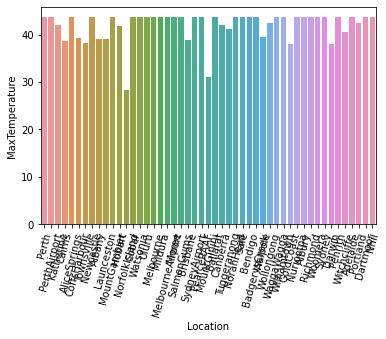

In [15]:
graph = sns.barplot(x=temperatures_df.Location , y=temperatures_df.MaxTemperature)
graph.set_xticklabels(graph.get_xticklabels() , rotation =75)
plt.show()

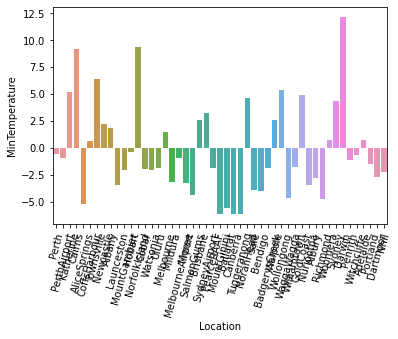

In [16]:
graph = sns.barplot(x=temperatures_df.Location , y=temperatures_df.MinTemperature)
graph.set_xticklabels(graph.get_xticklabels() , rotation =75)
plt.show()

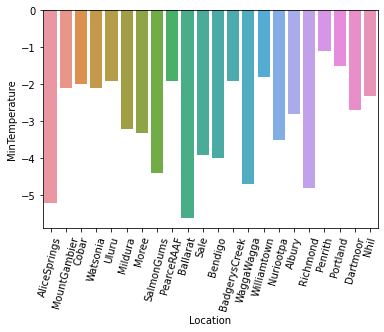

In [17]:
temp_df = temperatures_df[(temperatures_df['MaxTemperature'] > 42.00) & (temperatures_df['MinTemperature'] < -1.0)]
temp_df

graph = sns.barplot(x=temp_df['Location'] , y=temp_df['MinTemperature'])
graph.set_xticklabels(graph.get_xticklabels() , rotation =75)
plt.show()

# Select features and train our data.

In [18]:
data.shape

(140787, 21)

In [19]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
X = numerical.iloc[:,:20]
Y = data.iloc[:,20:]

In [21]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7


In [22]:
Y.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [23]:
X.shape

(140787, 14)

In [24]:
Y.shape

(140787, 1)

In [25]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.4)

In [53]:
# Logistic Regression
log = LogisticRegression(C=0.0001, max_iter=3000).fit(X_train,Y_train)

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
y_pred = log.predict(x_test)

In [55]:
print("Acurracy score: ", accuracy_score(y_test,y_pred))

Acurracy score:  0.8403622480688981


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     43811
         Yes       0.73      0.44      0.55     12504

    accuracy                           0.84     56315
   macro avg       0.79      0.69      0.72     56315
weighted avg       0.83      0.84      0.82     56315



In [30]:
print(confusion_matrix(y_test, y_pred))

[[41805  2006]
 [ 7061  5443]]


In [31]:
# RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, Y_train)

<ipython-input-31-4832231cbf39>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=7, random_state=0)

In [32]:
y_pred = clf.predict(x_test)

In [33]:
print("Acurracy score: ", accuracy_score(y_test,y_pred))

Acurracy score:  0.8433809819763829


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.97      0.91     43811
         Yes       0.78      0.41      0.54     12504

    accuracy                           0.84     56315
   macro avg       0.81      0.69      0.72     56315
weighted avg       0.84      0.84      0.82     56315



In [35]:
# AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=75, random_state=0)
clf.fit(X_train, Y_train)

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(n_estimators=75, random_state=0)

In [36]:
y_pred = clf.predict(x_test)

In [37]:
print("Acurracy score: ", accuracy_score(y_test,y_pred))

Acurracy score:  0.8445707182810974


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     43811
         Yes       0.72      0.48      0.58     12504

    accuracy                           0.84     56315
   macro avg       0.79      0.72      0.74     56315
weighted avg       0.83      0.84      0.83     56315



In [39]:
print(confusion_matrix(y_test, y_pred))

[[41505  2306]
 [ 6447  6057]]


In [56]:
# MLPClassifier with 4 hidden layers
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10,10,5), max_iter=3000).fit(X_train, Y_train)

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
y_pred = clf.predict(x_test)

In [58]:
print("Acurracy score: ", accuracy_score(y_test,y_pred))

Acurracy score:  0.8432744384267069


In [59]:
print(confusion_matrix(y_test, y_pred))

[[41773  2038]
 [ 6788  5716]]


In [62]:
# trying MLP Classifier with Cross-Validation set
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(X_train,Y_train,test_size = 0.25,train_size =0.75, random_state=123)

In [71]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10,10,5), max_iter=3000).fit(x_train, y_train)
y_pred = clf.predict(x_cv)
print("Acurracy score: ", accuracy_score(y_cv,y_pred))

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurracy score:  0.8416080687548831


In [72]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(20,15,10,5), max_iter=3000).fit(x_train, y_train)
y_pred = clf.predict(x_cv)
print("Acurracy score: ", accuracy_score(y_cv,y_pred))

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurracy score:  0.8424959159031181


In [73]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,5,10,5), max_iter=3000).fit(x_train, y_train)
y_pred = clf.predict(x_cv)
print("Acurracy score: ", accuracy_score(y_cv,y_pred))

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurracy score:  0.8403295688614248


In [74]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,5,10), max_iter=3000).fit(x_train, y_train)
y_pred = clf.predict(x_cv)
print("Acurracy score: ", accuracy_score(y_cv,y_pred))

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurracy score:  0.8363164997514028


In [75]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10,10,10,10), max_iter=3000).fit(x_train, y_train)
y_pred = clf.predict(x_cv)
print("Acurracy score: ", accuracy_score(y_cv,y_pred))

D:\CODE\Anatsonta\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurracy score:  0.8397258328006251


### Take the best features of hidden layers for new test

In [78]:
y_pred = clf.predict(x_test)
print("Acurracy score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

Acurracy score:  0.8444136657433057
[[21039  1007]
 [ 3374  2738]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.91     22046
         Yes       0.73      0.45      0.56      6112

    accuracy                           0.84     28158
   macro avg       0.80      0.70      0.73     28158
weighted avg       0.83      0.84      0.83     28158

